#### Thanks to:
- Amira Adel Foda (intake 42 - smart village branch - group 2)
- Asmaa Said (intake 42 - smart village branch - group 2)
- Marawan Mohamed (intake 42 - Alex. branch - group 2)


### Installing MediaPipe

In [2]:
%%capture
!pip install mediapipe

### Required Libraries

In [3]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

### Dowlining Data

In [4]:
# link of the data
# http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [5]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

In [6]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

### Preparing Data

In [8]:
# choosing random image
imagesPaths = os.listdir('/content/AFLW2000')
imagesPaths.sort()
data=[]
mat=[]
flag=1
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
for img in imagesPaths[1:]:
  entry=[]

  if img[-3:]=='jpg':
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # loading the image
        image = cv2.imread('/content/AFLW2000/'+img)
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None:
          flag=1
          # looping over the faces in the image
          for face in results.multi_face_landmarks:
              for landmark in face.landmark:
                  x = landmark.x
                  y = landmark.y
                  entry.append( (x,y) )
                  #print("x"*20,x)
                  # print('y'*20,y)
                  # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                  shape = image.shape
                  relative_x = int(x * shape[1])
                  relative_y = int(y * shape[0])
                  # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                  cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
          data.append(entry)
        else:
          print('Invaled Image')
          flag = 0
          #cv2_imshow(image)
  else:
    if flag:
      #print('MatFile')
      mat_file = sio.loadmat('/content/AFLW2000/'+img)
      pose_para = mat_file["Pose_Para"][0][:3]
      pitch = pose_para[0]
      yaw = pose_para[1]
      roll = pose_para[2]
      mat.append((pitch,yaw,roll))

Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invaled Image
Invale

In [9]:
len(data)

1853

In [10]:
data=np.array(data)
data.shape

(1853, 468, 2)

In [11]:
data[0].shape

(468, 2)

In [12]:
mat=np.array(mat)
mat.shape

(1853, 3)

In [13]:
np.savetxt('landmarks.csv', data.reshape(data.shape[0], -1), delimiter=',')

# Import the CSV file into a DataFrame
df = pd.read_csv('landmarks.csv', header=None)
df


,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,0.485651,0.686890,0.489194,0.639721,0.489802,0.647256,0.479730,0.562529,0.490558,0.621213,...,0.559712,0.485137,0.548437,0.492813,0.541429,0.500371,0.665668,0.471336,0.676091,0.464005
1,0.441502,0.642091,0.417273,0.592251,0.448839,0.610546,0.435994,0.545069,0.415757,0.576966,...,0.522467,0.506956,0.511393,0.511724,0.500658,0.514913,0.584451,0.500244,0.594060,0.495387
2,0.317797,0.799190,0.321328,0.776498,0.318316,0.782066,0.311064,0.745973,0.321459,0.767816,...,0.334413,0.717794,0.330334,0.720868,0.328639,0.723342,0.373404,0.713071,0.377643,0.709798
3,0.503922,0.694309,0.469521,0.653913,0.489504,0.658751,0.444433,0.590285,0.461756,0.637613,...,0.507567,0.500958,0.497731,0.510606,0.490586,0.518652,0.595615,0.455611,0.602670,0.444623
4,0.510238,0.669038,0.492729,0.604797,0.499756,0.624468,0.467368,0.542362,0.488200,0.584701,...,0.520501,0.481912,0.510743,0.488652,0.505667,0.492681,0.602484,0.452699,0.611310,0.448576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,0.515443,0.683951,0.532837,0.625785,0.518815,0.639885,0.511650,0.560010,0.535343,0.607497,...,0.549179,0.497122,0.541875,0.503230,0.540073,0.508401,0.629060,0.479723,0.635765,0.474628
1849,0.543907,0.689844,0.565286,0.635285,0.549289,0.646834,0.545585,0.562769,0.568493,0.616073,...,0.582100,0.493105,0.575992,0.500254,0.574974,0.506460,0.659800,0.479817,0.667754,0.470887
1850,0.586373,0.680103,0.604407,0.627700,0.593793,0.645848,0.602947,0.568153,0.609593,0.610428,...,0.663857,0.537300,0.654205,0.539478,0.648903,0.541426,0.734017,0.547668,0.743284,0.540139
1851,0.491617,0.692910,0.500626,0.637631,0.497282,0.649833,0.490064,0.559349,0.503418,0.617386,...,0.570748,0.490321,0.557697,0.496594,0.550279,0.502602,0.673963,0.481876,0.684592,0.474287


In [15]:
combined_array = np.hstack((df, mat))

# Save the combined array to a CSV file
np.savetxt('combined_data.csv', combined_array.reshape(combined_array.shape[0], -1), delimiter=',')


In [17]:
df2 = pd.read_csv('combined_data.csv', header=None)
df2

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,936,937,938
0,0.485651,0.686890,0.489194,0.639721,0.489802,0.647256,0.479730,0.562529,0.490558,0.621213,...,0.492813,0.541429,0.500371,0.665668,0.471336,0.676091,0.464005,-0.399231,0.018227,0.085676
1,0.441502,0.642091,0.417273,0.592251,0.448839,0.610546,0.435994,0.545069,0.415757,0.576966,...,0.511724,0.500658,0.514913,0.584451,0.500244,0.594060,0.495387,0.470065,1.189533,0.300959
2,0.317797,0.799190,0.321328,0.776498,0.318316,0.782066,0.311064,0.745973,0.321459,0.767816,...,0.720868,0.328639,0.723342,0.373404,0.713071,0.377643,0.709798,-0.184650,0.881137,-0.236852
3,0.503922,0.694309,0.469521,0.653913,0.489504,0.658751,0.444433,0.590285,0.461756,0.637613,...,0.510606,0.490586,0.518652,0.595615,0.455611,0.602670,0.444623,-0.175379,0.299208,-0.373374
4,0.510238,0.669038,0.492729,0.604797,0.499756,0.624468,0.467368,0.542362,0.488200,0.584701,...,0.488652,0.505667,0.492681,0.602484,0.452699,0.611310,0.448576,-0.026812,0.011965,-0.220662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,0.515443,0.683951,0.532837,0.625785,0.518815,0.639885,0.511650,0.560010,0.535343,0.607497,...,0.503230,0.540073,0.508401,0.629060,0.479723,0.635765,0.474628,-0.306358,-0.283822,0.038554
1849,0.543907,0.689844,0.565286,0.635285,0.549289,0.646834,0.545585,0.562769,0.568493,0.616073,...,0.500254,0.574974,0.506460,0.659800,0.479817,0.667754,0.470887,-0.367547,-0.429723,0.122791
1850,0.586373,0.680103,0.604407,0.627700,0.593793,0.645848,0.602947,0.568153,0.609593,0.610428,...,0.539478,0.648903,0.541426,0.734017,0.547668,0.743284,0.540139,-0.156035,0.567114,-0.108536
1851,0.491617,0.692910,0.500626,0.637631,0.497282,0.649833,0.490064,0.559349,0.503418,0.617386,...,0.496594,0.550279,0.502602,0.673963,0.481876,0.684592,0.474287,-0.197102,-0.070430,0.105118


In [18]:
df2.shape

(1853, 939)

In [19]:
from sklearn.model_selection import train_test_split

# Splitting features and target
X = df2.iloc[:, :936]  # Features
y = df2.iloc[:, 936:]  # Target

# Splitting into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting train set into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Check the shapes of each set
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (1111, 936) (1111, 3)
Validation set shape: (371, 936) (371, 3)
Test set shape: (371, 936) (371, 3)


In [20]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor


# Assuming your data is stored in variables train_X, train_y, val_X, val_y, test_X, test_y

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train)
val_X_scaled = scaler.transform(X_val)
test_X_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(train_X_scaled, y_train)

# Train SVR model
svr_model = SVR()
multioutput_svr = MultiOutputRegressor(svr_model)
multioutput_svr.fit(train_X_scaled, y_train)

# Predictions
xgb_predictions = xgb_model.predict(test_X_scaled)
svr_predictions = multioutput_svr.predict(test_X_scaled)

# Evaluation
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

print("XGBoost RMSE:", xgb_rmse)
print("SVR RMSE:", svr_rmse)


XGBoost RMSE: 0.5586801916356277
SVR RMSE: 0.14437278816648336


In [21]:
from sklearn.metrics import r2_score

# Calculate R2 score
xgb_r2_score = r2_score(y_test, xgb_predictions)
svr_r2_score = r2_score(y_test, svr_predictions)

print("XGBoost R2 Score:", xgb_r2_score)
print("SVR R2 Score:", svr_r2_score)


XGBoost R2 Score: -3.001581231112292
SVR R2 Score: 0.8024118437292199


In [22]:
svr_predictions[0]

array([-0.36613281,  0.03238033, -0.00795191])

In [23]:
import cv2
from google.colab.patches import cv2_imshow

import cv2

def get_landmark_entries(image_or_path):
    entry_list = []
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        if isinstance(image_or_path, str):
            # If image_or_path is a string, assume it's a path to an image
            image = cv2.imread(image_or_path)
        else:
            # Otherwise, assume it's the image itself
            image = image_or_path.copy()  # Make a copy of the image

        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks is not None:
            # looping over the faces in the image
            for face in results.multi_face_landmarks:
                entry = []
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    entry.append((x, y))
                    # note: the x and y values are scaled to their width and height so we will get back their actual value in the image
                    shape = image.shape
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
                entry_list.append(entry)
            #cv2.imshow("Landmarks Detected", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            return entry_list
        else:
            print('Invalid Image')
            return None

# Usage example:
random_file = 'image00053'
image_path = '/content/AFLW2000/' + random_file + '.jpg'
landmark_entries = get_landmark_entries(image_path)
landmark_entries=np.array(landmark_entries)
print(landmark_entries.shape)

# Alternatively, you can directly pass the image
image = cv2.imread(image_path)
landmark_entries = get_landmark_entries(image)
landmark_entries=np.array(landmark_entries)
landmark_entries=np.reshape(landmark_entries, (1, 936))
print(landmark_entries.shape)


(1, 468, 2)
(1, 936)


In [24]:
# Make predictions using SVR model
svr_predictions = multioutput_svr.predict(landmark_entries)

print("SVR Predictions:", svr_predictions)

SVR Predictions: [[-0.06207056  0.0413054  -0.02930578]]


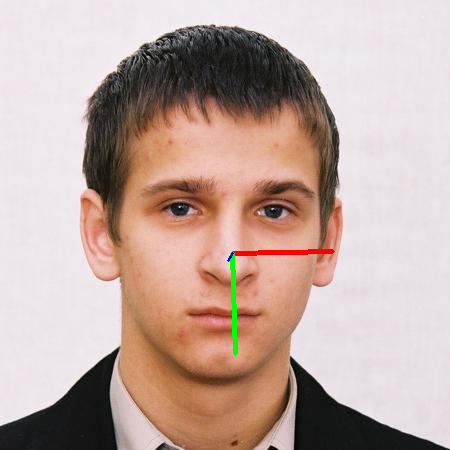

In [28]:
def Prediction(image,model):
  imageCpy=image
  # print(image.shape)
  # cv2_imshow(image)
  landmark_entries=get_landmark_entries(image)
  landmark_entries=np.reshape(landmark_entries, (1, 936))

  #print('landmark_entries ',landmark_entries.shape)
  angels=model.predict(landmark_entries)[0]
  #print('angels ',angels.shape)

  pitch = angels[0]
  yaw = angels[1]
  roll = angels[2]
  tx=landmark_entries[0][10]*image.shape[1]
  ty=landmark_entries[0][11]*image.shape[0]
  imageCpy = cv2.cvtColor(imageCpy, cv2.COLOR_BGR2RGB)
  #cv2_imshow(draw_axis(imageCpy,pitch,yaw,roll,tx,ty))
  return pitch,yaw,roll,tx,ty


def showPrediction(image,model):
  pitch,yaw,roll,tx,ty=Prediction(image,model)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2_imshow(draw_axis(image,pitch,yaw,roll,tx,ty))


showPrediction(image,multioutput_svr)



In [39]:
import cv2
import numpy as np

def predict_angles_from_video(video_path, model):
    cap = cv2.VideoCapture(video_path)
    angles_list = []
    frames_list = []

    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return angles_list

    # Loop through the video frames
    while True:
        ret, frame = cap.read()  # Read a frame from the video

        if not ret:
            break  # If no frame is returned, break the loop

        # Preprocess the frame if needed (e.g., resize, convert color)

        # Make prediction on the frame using the model
          # Assuming model.predict() takes a frame and returns angles
         # Convert the frame to RGB format
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        landmark_entries=get_landmark_entries(frame)
        landmark_entries=np.reshape(landmark_entries, (1, 936))
       # print('landmark_entries ',landmark_entries.shape)
        angles=model.predict(landmark_entries)[0]
       # print('angles ',angles.shape)

        # Append the predicted angles to the list
        angles_list.append(angles)
        frames_list.append(frame)


    # Release the VideoCapture object
    cap.release()

    return angles_list,frames_list

# Usage example:
# Assuming you have loaded the video_path and model
video_path = '/content/Types of Negative Emotions - Acting Challenge - IG Reels - Shriya Popat - Facial Expressions.mp4'
# model = your_model_instance
predicted_angles,frames_list = predict_angles_from_video(video_path, multioutput_svr)
print(predicted_angles)


[array([-0.07525183,  0.07443754, -0.03519811]), array([-0.07521096,  0.0744465 , -0.03518917]), array([-0.07541434,  0.07427517, -0.03517623]), array([-0.07541517,  0.07391006, -0.03518464]), array([-0.07527937,  0.07328385, -0.03523459]), array([-0.07528468,  0.07365008, -0.03539534]), array([-0.0752493 ,  0.07323546, -0.03540267]), array([-0.07524587,  0.07325102, -0.03540694]), array([-0.07519931,  0.07305779, -0.03528693]), array([-0.07512673,  0.07303514, -0.03531459]), array([-0.07516434,  0.07296346, -0.03535327]), array([-0.07519366,  0.07296293, -0.03535409]), array([-0.07523373,  0.07304684, -0.03537842]), array([-0.07531378,  0.07310756, -0.03549716]), array([-0.07529543,  0.07323338, -0.0354586 ]), array([-0.07527866,  0.07307309, -0.03553832]), array([-0.07523045,  0.07309093, -0.03560236]), array([-0.07513619,  0.07284482, -0.03554117]), array([-0.07473081,  0.07304409, -0.03619117]), array([-0.07466173,  0.07315711, -0.03635641]), array([-0.07460077,  0.07271911, -0.036

In [40]:
len(frames_list)

898

array([[[4, 4, 4],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[4, 4, 4],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 3, 3],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]],

       ...,

       [[7, 0, 0],
        [7, 0, 0],
        [3, 0, 2],
        ...,
        [2, 0, 0],
        [0, 0, 5],
        [0, 0, 5]],

       [[7, 0, 0],
        [7, 0, 0],
        [3, 0, 2],
        ...,
        [3, 1, 0],
        [0, 0, 5],
        [0, 0, 5]],

       [[7, 0, 0],
        [7, 0, 0],
        [3, 0, 2],
        ...,
        [3, 1, 0],
        [0, 0, 5],
        [0, 0, 5]]], dtype=uint8)
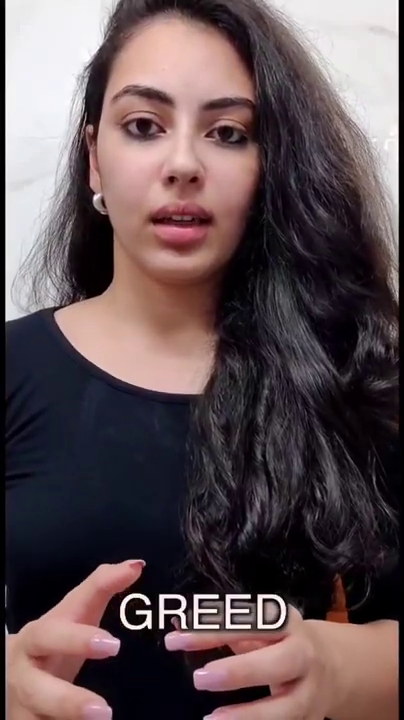

In [41]:
frames_list[100]

In [42]:
len(predicted_angles)

898

In [43]:
predicted_angles[0]

array([-0.07525183,  0.07443754, -0.03519811])

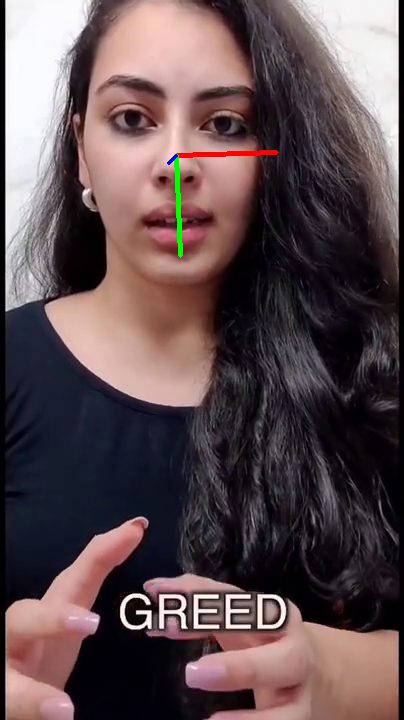

In [44]:
showPrediction(frames_list[150],multioutput_svr)

In [2]:
#predicted_angles,frames_list = predict_angles_from_video('/content/WhatsApp Video 2024-03-03 at 5.22.19 PM.mp4', multioutput_svr)

In [46]:
def process_frames_list(frames_list, model):
    processed_frames = []
    for frame in frames_list:
        pitch, yaw, roll, tx, ty = Prediction(frame, model)
        processed_frame = draw_axis(frame, pitch, yaw, roll, tx, ty)
        processed_frames.append(processed_frame)
    return processed_frames

def save_video(frames, output_path, fps=30.0):
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frames[0].shape[1], frames[0].shape[0]))

    # Write processed frames to the video
    for frame in frames:
        out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    # Release the VideoWriter object
    out.release()

# Process frames_list and save the processed frames into a video
processed_frames = process_frames_list(frames_list, multioutput_svr)
save_video(processed_frames, 'output_video.mp4')